# 4.10: Coding Etiquette & Excel Reporting
# Questions 6-9

Content List:
1. Import Libraries, Create Path and Import Datasets
2. Create Bar Charts for newly created customer profiles
3. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
4. Compare customer profiles with regions. Produce suitable charts to illustrate results.
5. Compare customer profiles with departments. Produce suitable charts to illustrate results.

1. Import Libraries, Create Path and Import Datasets

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os

#import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create Path
path = r'C:\Users\ryanc\OneDrive\Documents\Data Analytics Exercises\Python\Instacart Basket Analysis'

In [3]:
#Import merged_410_new df
merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_410_new.pkl'))

In [4]:
#Check shape of data
merged.shape

(32404859, 17)

2. Create Bar Charts for newly created customer profiles

In [5]:
#See all columns
pd.set_option('display.max_columns', None)

In [6]:
#View head of data
merged.head()

,department_id,prices,order_id,user_id,order_number,spender_flag,State,Age,n_dependants,income,fam_status,region,customer_activity_flag,age_group,income_group,dept_label,n_dependants_group
0,19,5.8,3139998,138,28,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity,65_up,Low Income,Groceries,Young Parent
1,19,5.8,1977647,138,30,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity,65_up,Low Income,Groceries,Young Parent
2,12,20.0,3160996,138,1,Low Spender,Minnesota,81,1,49620,married,Midwest,low activity,65_up,Low Income,Groceries,Young Parent
3,12,20.0,2254091,138,10,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity,65_up,Low Income,Groceries,Young Parent
4,10,12.9,505689,138,9,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity,65_up,Low Income,Groceries,Young Parent


Text(0.5, 1.0, 'Customer Age Groups')

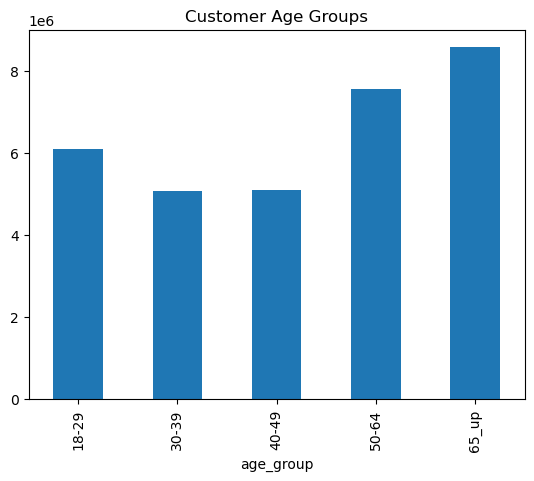

In [7]:
#Create a bar chart for age groups
bar_age_groups = merged['age_group'].value_counts().sort_index().plot.bar()
plt.title("Customer Age Groups",fontsize=12)

In [10]:
#Export the chart
bar_age_groups.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_groups.png'))

Text(0.5, 1.0, 'Income Groups')

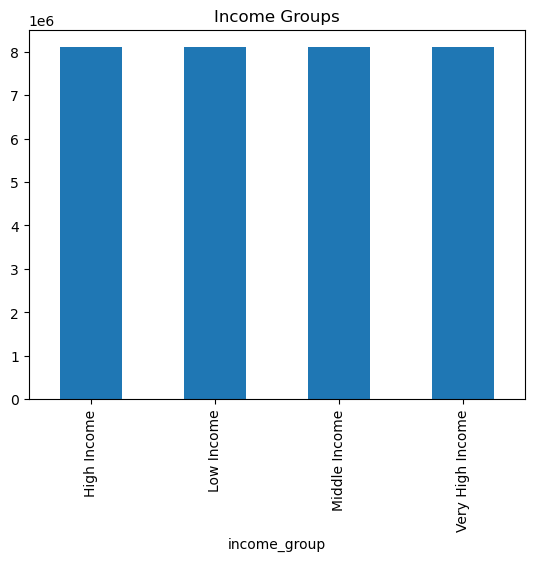

In [8]:
#Create a bar chart for income groups
bar_incomes_groups = merged['income_group'].value_counts().sort_index().plot.bar()
plt.title("Income Groups",fontsize=12)

In [14]:
#Export the chart
bar_incomes_groups.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_incomes_groups.png'))

Text(0.5, 1.0, 'Departments')

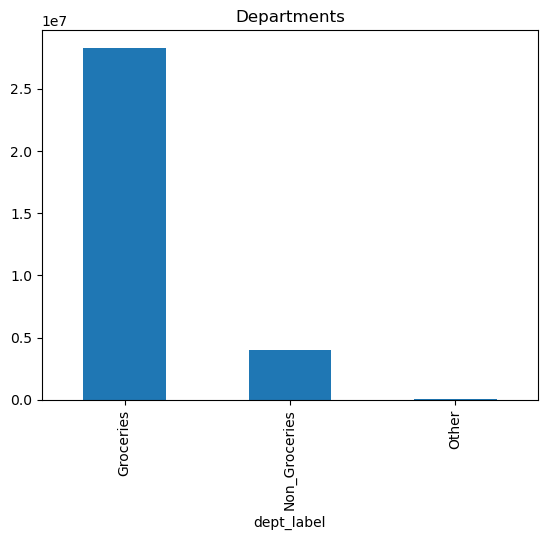

In [9]:
#Create a bar chart for dept_label
bar_dept_label = merged['dept_label'].value_counts().sort_index().plot.bar()
plt.title("Departments",fontsize=12)

In [16]:
#Export the chart
bar_dept_label.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_label.png'))

Text(0.5, 1.0, 'Dependants')

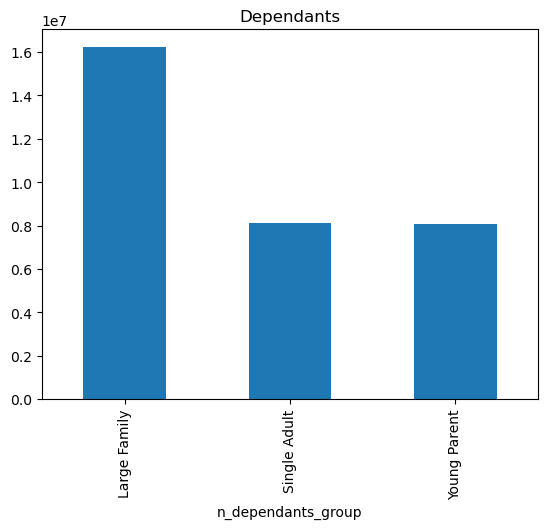

In [10]:
#Create a bar chart for number of dependants
n_dependants = merged['n_dependants_group'].value_counts().sort_index().plot.bar()
plt.title("Dependants",fontsize=12)

In [18]:
#Export the chart
n_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_n_dependants.png'))

3. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [11]:
##Age Groups
#Aggregate the max, mean, and min variables of age groups for order_number and prices 
Age_group_agg = merged.groupby('age_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [12]:
#View Result
Age_group_agg

order_number             prices              
                  mean min max       mean  min      max
age_group                                              
18-29        17.107372   1  99  12.171977  1.0  99999.0
30-39        17.244223   1  99  11.933288  1.0  99999.0
40-49        17.151719   1  99  12.384515  1.0  99999.0
50-64        17.145663   1  99  11.823702  1.0  99999.0
65_up        17.098243   1  99  11.768850  1.0  99999.0

In [13]:
##Income Groups
#Aggregate the max, mean, and min variables of income groups for order_number and prices 
income_group_agg = merged.groupby('income_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [14]:
#View Result
income_group_agg

order_number             prices              
                         mean min max       mean  min      max
income_group                                                  
High Income         17.188468   1  99   9.830574  1.0  99999.0
Low Income          16.644854   1  99   7.291562  1.0  14900.0
Middle Income       17.435359   1  99   8.754814  1.0  99999.0
Very High Income    17.300576   1  99  22.044322  1.0  99999.0

In [15]:
##Dept Labels
#Aggregate the max, mean, and min variables of dept_labels for order_number and prices 
dept_label_agg = merged.groupby('dept_label').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [16]:
#View Result
dept_label_agg

order_number             prices              
                      mean min max       mean  min      max
dept_label                                                 
Groceries        17.180117   1  99  12.587828  1.0  99999.0
Non_Groceries    16.774609   1  99   7.791567  1.0     15.0
Other            20.966444   1  99   8.085978  1.0     15.0

In [17]:
##number of dependants
#Aggregate the max, mean, and min variables of n_dependants for order_number and prices 
n_dependants_group_agg = merged.groupby('n_dependants_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [18]:
#View Result
n_dependants_group_agg

order_number             prices              
                           mean min max       mean  min      max
n_dependants_group                                              
Large Family          17.103375   1  99  12.080623  1.0  99999.0
Single Adult          17.264622   1  99  12.129243  1.0  99999.0
Young Parent          17.097906   1  99  11.629316  1.0  99999.0

4. Compare customer profiles with regions. Produce suitable charts to illustrate results.

In [25]:
##Age x Region
#Create a crosstab of 'Age Groups' and 'Region' columns
crosstab_age_region = pd.crosstab(merged['age_group'], merged['region'], dropna = False)

In [26]:
#View crosstab
crosstab_age_region

region,Midwest,North East,South,West
age_group,,,,
18-29,1420705,1070437,2052633,1546666
30-39,1180424,888917,1723110,1281300
40-49,1227062,900208,1677004,1304963
50-64,1778290,1309271,2502881,1965904
65_up,1990844,1553903,2836257,2194080


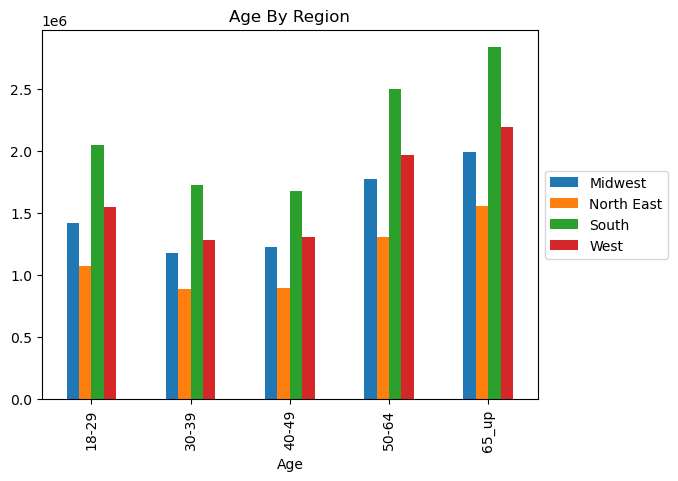

In [28]:
#Create bar chart of this crosstab (Age x Region)
region_age_bar = crosstab_age_region.plot.bar()
plt.xlabel("Age", fontsize=10)
plt.title("Age By Region",fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [29]:
#Export bar graph
region_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_age_bar.png'))

In [30]:
##Income x Region
#Create a crosstab of 'Income Groups' and 'Region' columns
crosstab_income_region = pd.crosstab(merged['income_group'], merged['region'], dropna = False)

In [31]:
#View crosstab
crosstab_income_region

region,Midwest,North East,South,West
income_group,,,,
High Income,1934891,1432106,2650186,2084018
Low Income,1876433,1429459,2716231,2079521
Middle Income,1857958,1420315,2759213,2063490
Very High Income,1928043,1440856,2666255,2065884


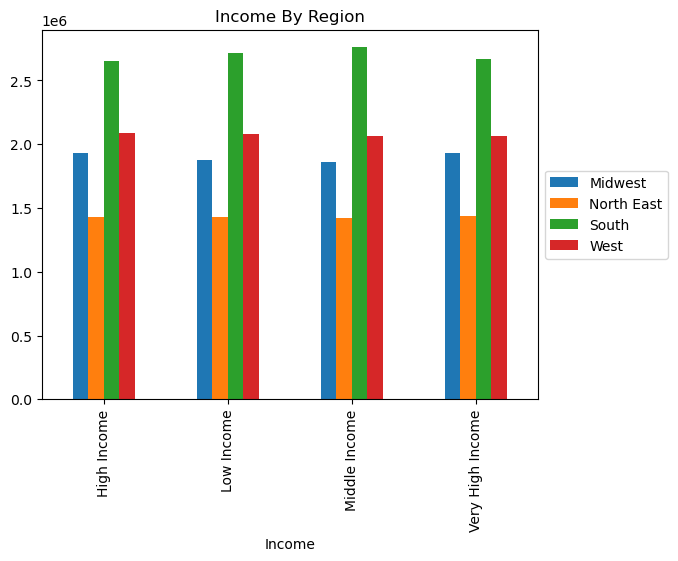

In [32]:
#Create bar chart of this crosstab (Income x Region)
region_income_bar = crosstab_income_region.plot.bar()
plt.xlabel("Income", fontsize=10)
plt.title("Income By Region",fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [33]:
#Export bar graph
region_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_income_bar.png'))

In [34]:
##Dependants x Region
#Create a crosstab of 'Dependants Groups' and 'Region' columns
crosstab_dependants_region = pd.crosstab(merged['n_dependants_group'], merged['region'], dropna = False)

In [56]:
#View crosstab
crosstab_dependants_region

region,Midwest,North East,South,West
n_dependants_group,,,,
Large Family,3765653,2862182,5430496,4167921
Single Adult,1905200,1418301,2701659,2072343
Young Parent,1926472,1442253,2659730,2052649


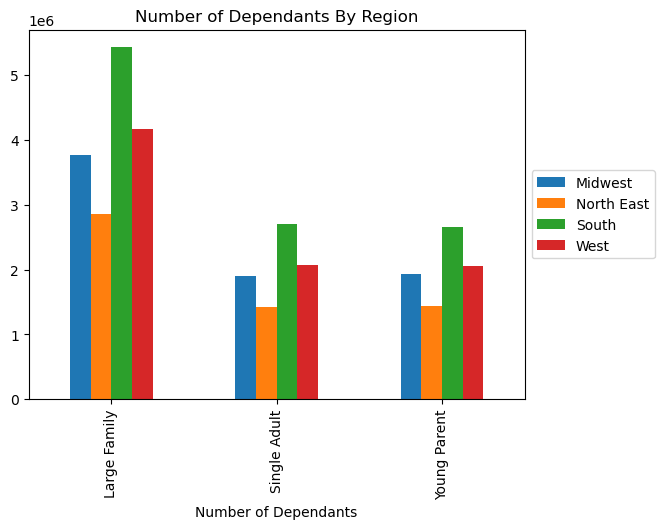

In [57]:
#Create bar chart of this crosstab (Dependants x Region)
region_dependants_bar = crosstab_dependants_region.plot.bar()
plt.xlabel("Number of Dependants", fontsize=10)
plt.title("Number of Dependants By Region",fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [58]:
#Export bar graph
region_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dependants_bar.png'))

In [38]:
##Dept_Label x Region
#Create a crosstab of 'Dept_Label' and 'Region' columns
crosstab_dept_region = pd.crosstab(merged['dept_label'], merged['region'], dropna = False)

In [59]:
#View crosstab
crosstab_dept_region

region,Midwest,North East,South,West
dept_label,,,,
Groceries,6632117,4994131,9424305,7242704
Non_Groceries,940253,709646,1332175,1024092
Other,24955,18959,35405,26117


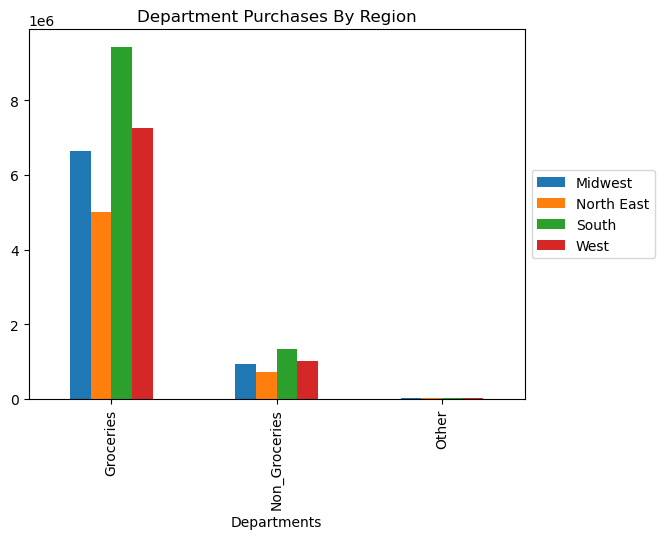

In [60]:
#Create bar chart of this crosstab (Departments x Region)
region_dept_bar = crosstab_dept_region.plot.bar()
plt.xlabel("Departments", fontsize=10)
plt.title("Department Purchases By Region",fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [61]:
#Export bar graph
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dept_bar.png'))

5. Compare customer profiles with departments. Produce suitable charts to illustrate results.

In [45]:
##Age x Department
#Create a crosstab of 'Age' and 'Dept_Label' columns
crosstab_age_dept = pd.crosstab(merged['age_group'], merged['dept_label'], dropna = False)

In [46]:
#View crosstab
crosstab_age_dept

dept_label,Groceries,Non_Groceries,Other
age_group,,,
18-29,5312986,756865,20590
30-39,4433523,624044,16184
40-49,4456832,635663,16742
50-64,6595598,936347,24401
65_up,7494318,1053247,27519


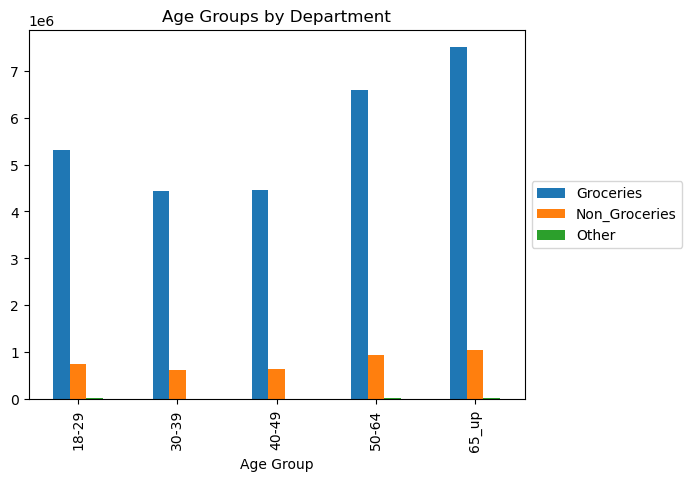

In [47]:
#Create bar chart of this crosstab (Age Group x Dept)
age_dept_bar = crosstab_age_dept.plot.bar()
plt.xlabel("Age Group", fontsize=10)
plt.title("Age Groups by Department",fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [48]:
#Export bar graph
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dept_bar.png'))

In [49]:
##Income x Department
#Create a crosstab of 'Income' and 'Dept_Label' columns
crosstab_income_dept = pd.crosstab(merged['income_group'], merged['dept_label'], dropna = False)

In [50]:
#View crosstab
crosstab_income_dept

dept_label,Groceries,Non_Groceries,Other
income_group,,,
High Income,7077365,998002,25834
Low Income,7082957,992549,26138
Middle Income,7077852,996265,26859
Very High Income,7055083,1019350,26605


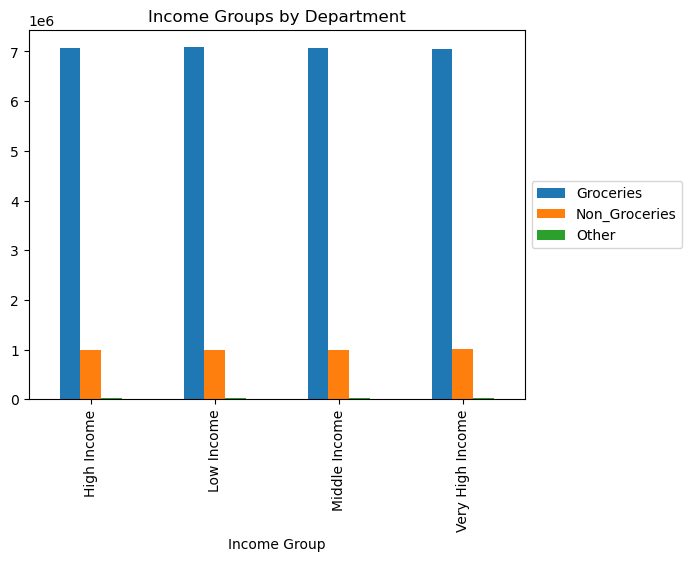

In [51]:
#Create bar chart of this crosstab (Income Group x Dept)
income_dept_bar = crosstab_income_dept.plot.bar()
plt.xlabel("Income Group", fontsize=10)
plt.title("Income Groups by Department",fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [52]:
#Export bar graph
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_dept_bar.png'))

In [53]:
##Dependants x Department
#Create a crosstab of 'Dependants' and 'Dept_Label' columns
crosstab_dependants_dept = pd.crosstab(merged['n_dependants_group'], merged['dept_label'], dropna = False)

In [54]:
#View crosstab
crosstab_dependants_dept

dept_label,Groceries,Non_Groceries,Other
n_dependants_group,,,
Large Family,14168414,2004983,52855
Single Adult,7071571,999669,26263
Young Parent,7053272,1001514,26318


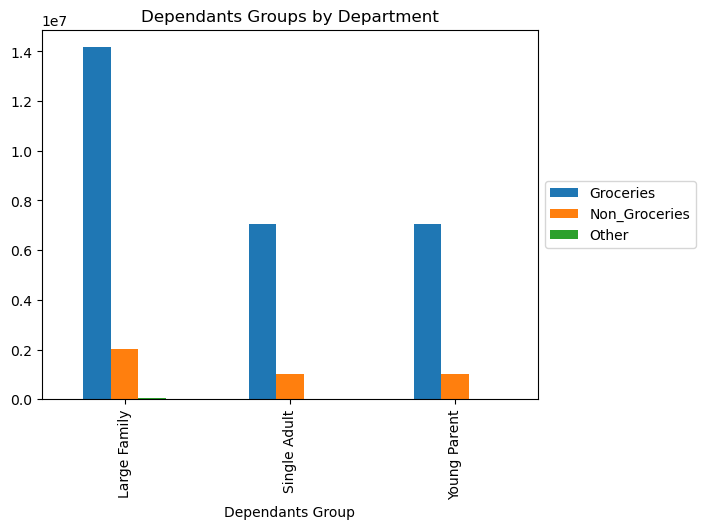

In [55]:
#Create bar chart of this crosstab (Dependants Group x Dept)
dependants_dept_bar = crosstab_dependants_dept.plot.bar()
plt.xlabel("Dependants Group", fontsize=10)
plt.title("Dependants Groups by Department",fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Compare your customer profiles with regions and departments. Can you identify a link between them?

In general, the South has a larger customer base than the other regions and are therefore responsible for more orders
than any other region. Large families also buy more than those with 0 or 1 dependant. However, some of this data and graphs
that were created are slightly hard to interpret as this data is not broken down on a 'per customer' level. The South makes more
purchases by dept and more purchases by dependant group but they also have more people using Instacart so this is expected. It's
therefore hard to see if they are spending more or buying more as dependant group on a 'per customer' level.